# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Hilman Fauji Abdilah
- **Email:** accesinternethilmanfauzi@gmail.com
- **ID Dicoding:** hilmanfaujiabdilah

## Menentukan Pertanyaan Bisnis

Perusahaan penyewaan sepeda perlu melakukan evaluasi penyewaan sepeda dan menemukan pola kapan waktu dengan penyewaan tertinggi dan terendah

- kapan jumlah penyewaan tertinggi dan terendah berdasarkan hari kerja?
- bagaimana tren penyewaan berdasarkan cuaca?

## Import Semua Packages/Library yang Digunakan

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [3]:
day_df = pd.read_csv('https://raw.githubusercontent.com/hilmanfaujiabdilah/tugas-akhir-course-analisis-data/refs/heads/main/data/day.csv')
day_df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [4]:
hour_df = pd.read_csv('https://raw.githubusercontent.com/hilmanfaujiabdilah/tugas-akhir-course-analisis-data/refs/heads/main/data/hour.csv')
hour_df

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


**Insight:**
- Data terbagi menjadi dua tabel yaitu tabel day dan tabel hour
- file day terdiri dari 731 baris dan 16 kolom
- file hour terdiri dari 17.379 bari dan 17 kolom
- kolom hr (jam) hanya ada dalam tabel hour
- struktur kolom terdiri dari:
  - instant
  - dteday : tanggal
  - season : musim 1:springer, 2:summer, 3:fall, 4:winter
  - yr : tahun 0: 2011, 1:2012
  - mnth : bulan 1 to 12
  - hr : jam 0 to 23
  - holiday : hari cuaca adalah hari libur atau tidak
  - weekday	: hari dalam seminggu
  - workingday : jika hari bukan akhir pekan atau hari libur adalah 1, jika tidak adalah 0.
  - weathersit (cuaca)
    - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
    - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
  - temp : Suhu yang dinormalisasi dalam Celcius. Nilainya dibagi menjadi 41 (maks)
  - atemp	: Suhu yang dirasakan, dinormalisasi dalam Celcius. Nilai dibagi menjadi 50 (maks)
  - hum	: Kelembaban. Nilai dibagi menjadi maks 100
  - windspeed	: Kecepatan angin. Nilainya dibagi menjadi maks 67
  - casual : jumlah pengguna biasa
  - registered : count of registered users
  - cnt : Jumlah total sepeda sewaan kasual dan terdaftar
- struktur kolom dari kedua tabel tersebut hapir sama, perbedaan nya pada kolom hr yang hanya terdapat pada tabel hour, untuk itu data yang digunakan untuk analisis hanya pada tabel day

### Assessing Data

### Menilai tabel day

In [5]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [6]:
print("jumlah duplikasi : ", day_df.duplicated().sum())

jumlah duplikasi :  0


In [7]:
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [8]:
day_df.describe(include='all')

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


**Insight:**
- Tidak ada data yang duplikat maupun missing value missing value, sehingga data sudah cukup bersih
- kolom dteday memiliki tipe data object yang seharusnya adalah datetime

### Cleaning Data

In [13]:
datetime_columns = ["dteday"]

for column in datetime_columns:
  day_df[column] = pd.to_datetime(day_df[column])

In [14]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

**Insight:**
- Kolom dteday sudah beripe datetime
- data sudah terlihat bersih

## Exploratory Data Analysis (EDA)

### Explore day_df

In [16]:
day_df.describe(include='all')

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [42]:
day_df.groupby(by='workingday').agg({
    'instant' : 'nunique',
    'cnt' : ['max', 'min', 'mean', 'std'],
})

instant   cnt                               
           nunique   max  min         mean          std
workingday                                             
0              231  8714  605  4330.168831  2052.141245
1              500  8362   22  4584.820000  1878.415583

In [41]:
day_df.groupby(by="weathersit").instant.nunique().sort_values(ascending=False)

,instant
weathersit,
1,463
2,247
3,21


**Insight:**
- penyewaan sepeta lebih tinggi pada hari kerja dibandingkan pada hari libur atau akhir pekan
- penyewaan sepeda tinggi pada:
  - cuaca pertama yaitu Cerah, Beberapa awan, Sebagian berawan, Sebagian berawan Cerah, Beberapa awan, Sebagian berawan dan Sebagian berawan. pada musim kedua
  - cuaca kedua yaitu Kabut + Berawan, Kabut + Awan pecah, Kabut + Beberapa awan, Kabut. penyewaan cenderung turun
  - pada cuaca ketiga, penyewaan turun drastis, dan pada cuaca ketiga penyewaan tidak ada penyewaan.

## Visualization & Explanatory Analysis

### Pertanyaan 1: kapan jumlah penyewaan tertinggi dan terendah berdasarkan hari kerja?

In [78]:
sum_day_df = day_df.groupby("workingday").cnt.sum().sort_values(ascending=False).reset_index()
sum_day_df

,workingday,cnt
0,1,2292410
1,0,1000269


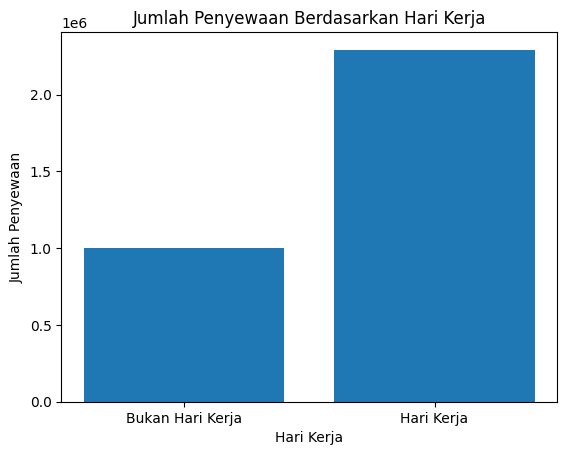

In [81]:
plt.bar(x=sum_day_df['workingday'], height=sum_day_df['cnt'])
plt.xlabel("Hari Kerja")
plt.ylabel("Jumlah Penyewaan")
plt.xticks([0, 1], ['Bukan Hari Kerja', 'Hari Kerja'])
plt.title("Jumlah Penyewaan Berdasarkan Hari Kerja")
plt.show()

### Pertanyaan 2: bagaimana tren penyewaan berdasarkan cuaca?

In [62]:
sum_day_df = day_df.groupby("weathersit").cnt.sum().sort_values(ascending=False).reset_index()
sum_day_df

,weathersit,cnt
0,1,2257952
1,2,996858
2,3,37869


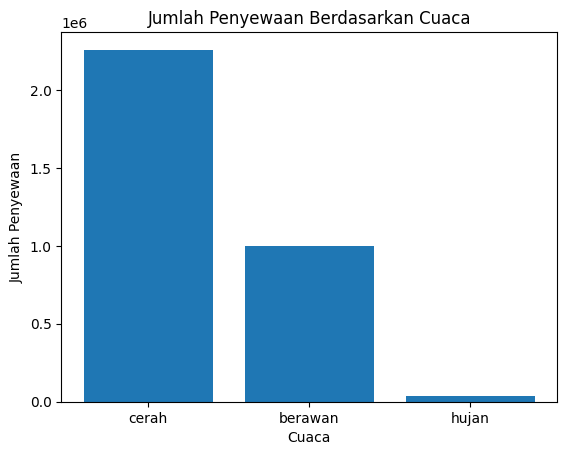

In [74]:
plt.bar(x=sum_day_df['weathersit'], height=sum_day_df['cnt'])
plt.xlabel("Cuaca")
plt.ylabel("Jumlah Penyewaan")
plt.xticks([1, 2, 3], ['cerah', 'berawan','hujan'])
plt.title("Jumlah Penyewaan Berdasarkan Cuaca")
plt.show()

**Insight:**
- Dalam visualisasi data penyewaan berdasarkan hari kerja, penyewaan tinggi saat hari kerja di bandingkan dengan hari libur
- Dalam visualisasi data penyewaan berdasarkan cuaca, penyewaan tinggi saat cuaca cerah, sedang pada cuaca awan, dan sedikit pada cuaca hujan

## Analisis Lanjutan (Opsional)

## Conclusion

- Penyewaan sepeda tertinggi terjadi ketika hari kerja, dan terendah terjadi pada hari libur atau akhir pekan.
- Pada cuaca yang cerah atau sedikit berawan penyewaan sepeda sangat tinggi, sedangkan pada saat cuaca berkabut atau berawan penyewaan lebih rendah di bandingkan dengan pada cuaca cerah, dan pada saat hujan penyewaan sepeda sangat rendah, serta pada cuaca salju tidak ada penyewaan sama sekali